In [212]:
import pandas as pd

# Load the transaction data with proper data types 
transaction_df = pd.read_csv(
    "TRANSACTION_TAKEHOME.csv",
    
    parse_dates=["PURCHASE_DATE", "SCAN_DATE"],
    
    dtype={
        "BARCODE": "Int64",      
     #  "FINAL_QUANTITY": "float64", #   
     #  "FINAL_SALE": "float64",  # 
# I discovered in later steps that FINAL_QUANTITY consists of both char and numeric values. load these fields as default here and will process later. 
        "RECEIPT_ID": "string",
        "STORE_NAME": "string",
        "USER_ID": "string" 
    }
)
transaction_df.info()
print(transaction_df.dtypes)


# Load the product data with proper data types 
product_df = pd.read_csv("PRODUCTS_TAKEHOME.csv")

product_df = pd.read_csv(
    "PRODUCTS_TAKEHOME.csv",
    
    dtype={
        "BARCODE": "Int64",      
        "CATEGORY_1": "string",
        "CATEGORY_2": "string",
        "CATEGORY_3": "string", 
        "CATEGORY_4": "string",
        "MANUFACTURER": "string",
        "BRAND": "string"
    }
)
product_df.info()
print(product_df.dtypes)


# Load the user data with proper data types 
user_df = pd.read_csv("USER_TAKEHOME.csv")

user_df = pd.read_csv(
    "USER_TAKEHOME.csv",

    parse_dates=["CREATED_DATE", "BIRTH_DATE"],
    
    dtype={     
        "ID": "string",
        "STATE": "string",
        "LANGUAGE": "string",
        "GENDER": "string"
    }
)
user_df.info()
print(user_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      50000 non-null  string             
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]     
 2   SCAN_DATE       50000 non-null  datetime64[ns, UTC]
 3   STORE_NAME      50000 non-null  string             
 4   USER_ID         50000 non-null  string             
 5   BARCODE         44238 non-null  Int64              
 6   FINAL_QUANTITY  50000 non-null  object             
 7   FINAL_SALE      50000 non-null  object             
dtypes: Int64(1), datetime64[ns, UTC](1), datetime64[ns](1), object(2), string(3)
memory usage: 3.1+ MB
RECEIPT_ID             string[python]
PURCHASE_DATE          datetime64[ns]
SCAN_DATE         datetime64[ns, UTC]
STORE_NAME             string[python]
USER_ID                string[python]
BARCODE                     

In [213]:
# ARE THERE ANY DATA QUALITY ISSUES PRESENT 
# Data quality check for user table 
# Show the first 10 rows to skim through. Looks good so far 
print("\nUser Data:")
print(user_df.head(10))

# Check missing values 
print("\nMissing values in User:\n", user_df.isnull().sum())
print("\nUser numeric summary:\n", user_df[['ID']].describe())
# Findings: BIRTH_DATE, STATE, LANGUAGE and GNEDER fields have missing values. ID field is ideal, 100000 counts with 100000 unique values. 

# Check min and max create data 
min_create_date = user_df['CREATED_DATE'].min()
max_create_date = user_df['CREATED_DATE'].max()
print("Minimum created date:", min_create_date)
print("Maximum created date:", max_create_date)

# Check min and max birth data 
min_birth_date = user_df['BIRTH_DATE'].min()
max_birth_date = user_df['BIRTH_DATE'].max()
print("Minimum birth date:", min_birth_date)
print("Maximum birth date:", max_birth_date)
# Findings: both created date and birth date are reasonable. 


User Data:
                         ID              CREATED_DATE  \
0  5ef3b4f17053ab141787697d 2020-06-24 20:17:54+00:00   
1  5ff220d383fcfc12622b96bc 2021-01-03 19:53:55+00:00   
2  6477950aa55bb77a0e27ee10 2023-05-31 18:42:18+00:00   
3  658a306e99b40f103b63ccf8 2023-12-26 01:46:22+00:00   
4  653cf5d6a225ea102b7ecdc2 2023-10-28 11:51:50+00:00   
5  5fe2b6f3ad416a1265c4ab68 2020-12-23 03:18:11+00:00   
6  651210546816bb4d035b1ead 2023-09-25 22:57:24+00:00   
7  642831ea3d4434e63c1936fd 2023-04-01 13:30:18+00:00   
8  63a4c9a1b5f32149b9d82f9e 2022-12-22 21:18:25+00:00   
9  63654b21d02459d8a57a2e2c 2022-11-04 17:25:53+00:00   

                 BIRTH_DATE STATE LANGUAGE      GENDER  
0 2000-08-11 00:00:00+00:00    CA   es-419      female  
1 2001-09-24 04:00:00+00:00    PA       en      female  
2 1994-10-28 00:00:00+00:00    FL   es-419      female  
3                       NaT    NC       en        <NA>  
4 1972-03-19 00:00:00+00:00    PA       en      female  
5 1999-10-27 04:00

In [214]:
# Data quality check for tranction table 
# Show the first 10 rows to skim through 
print("\nTransaction Data:")
print(transaction_df.head(10))
# Findings: FINAL_QUANTITY field has both integar and char values such as 1.00 and 'zero'. FINAL_SALE has missing values (even when quantity is 1). 

# Check missing values 
print("\nMissing values in Transaction:\n", transaction_df.isnull().sum()) 
# Findings: BARCODE field has missing values. 

# Check min and max create data 
min_purchase_date = transaction_df['PURCHASE_DATE'].min()
max_purchase_date = transaction_df['PURCHASE_DATE'].max()
print("Minimum purchase date:", min_purchase_date)
print("Maximum purchase date:", max_purchase_date)

# Check min and max birth data 
min_scan_date = transaction_df['SCAN_DATE'].min()
max_scan_date = transaction_df['SCAN_DATE'].max()
print("Minimum scan date:", min_scan_date)
print("Maximum scan date:", max_scan_date)
# Findings: Both purhcase date and scan date look good. It seems like we only have transaction data from Jun to Sep 2024.

# Check if barcodes are legit  
print("=== MIN BARCODE ===")
print(transaction_df['BARCODE'].min())
print("\n=== MAX BARCODE ===")
print(transaction_df['BARCODE'].max()) 
# Barcodes are supposed to be integars and they look reasonable with min at -1 and max at 9347108002132

# Check fianl_quantity field
print("=== MIN FINAL QUANTITY ===")
print(transaction_df['FINAL_QUANTITY'].min())
print("\n=== MAX FINAL QUANTITY ===")
print(transaction_df['FINAL_QUANTITY'].max())
# See each value and count - there are 12500 zeros 
print(transaction_df["FINAL_QUANTITY"].value_counts()) 
# Checck if there is any other char in this supposedly numeric field. Output shows 12500 and confirms there is nothing else other than 'zero'. 
non_numeric_mask = pd.to_numeric(transaction_df['FINAL_QUANTITY'], errors='coerce').isna()
non_numeric_count = non_numeric_mask.sum()
print(f"Number of non-numeric values in FINAL_QUANTITY: {non_numeric_count}")
# Converts final quantity field to numeric by changing all 'zero' to 0 
transaction_df['FINAL_QUANTITY'] = transaction_df['FINAL_QUANTITY'].replace({'zero': '0'})
transaction_df['FINAL_QUANTITY'] = pd.to_numeric(transaction_df['FINAL_QUANTITY'], errors='coerce')

# Check final_sale field
print("=== MIN FINAL SALE ===")
print(transaction_df['FINAL_SALE'].min())
print("\n=== MAX SALE ===")
print(transaction_df['FINAL_SALE'].max())
# convert to numeric 
transaction_df['FINAL_SALE'] = pd.to_numeric(transaction_df['FINAL_SALE'], errors='coerce')

# now both fields shown as numeric 
transaction_df.info()
print(transaction_df.dtypes)


Transaction Data:
                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   
5  0002d8cd-1701-4cdd-a524-b70402e2dbc0    2024-06-24   
6  000550b2-1480-4c07-950f-ff601f242152    2024-07-06   
7  00096c49-8b04-42f9-88ce-941c5e06c4a7    2024-08-19   
8  000e1d35-15e5-46c6-b6b3-33653ed3d27e    2024-08-13   
9  0010d87d-1ad2-4e5e-9a25-cec736919d15    2024-08-04   

                         SCAN_DATE STORE_NAME                   USER_ID  \
0 2024-08-21 14:19:06.539000+00:00    WALMART  63b73a7f3d310dceeabd4758   
1 2024-07-20 09:50:24.206000+00:00       ALDI  62c08877baa38d1a1f6c211a   
2 2024-08-19 15:38:56.813000+00:00    WALMART  60842f207ac8b7729e472020   
3 2024-06-19 11:03:37.468000+00:00  FOOD LION  63fcd7

In [215]:
# Data quality check for products table 
# Show the first 10 rows to skim through 
print("\nProduct Data:")
print(product_df.head(10))

# Check missing values 
print("\nMissing values in Product:\n", product_df.isnull().sum()) 
## Findings: All fields have missing values. Going from category_1 to category_4, there seems to be more missing values.   

# Check if barcodes are legit  
print("=== MIN BARCODE ===")
print(product_df['BARCODE'].min())
print("\n=== MAX BARCODE ===")
print(product_df['BARCODE'].max()) 
# Barcodes look good 


Product Data:
          CATEGORY_1                  CATEGORY_2  \
0  Health & Wellness               Sexual Health   
1             Snacks               Puffed Snacks   
2  Health & Wellness                   Hair Care   
3  Health & Wellness                   Oral Care   
4  Health & Wellness      Medicines & Treatments   
5  Health & Wellness                   Hair Care   
6  Health & Wellness      Medicines & Treatments   
7  Health & Wellness  Deodorant & Antiperspirant   
8             Snacks                  Snack Bars   
9  Health & Wellness                        <NA>   

                         CATEGORY_3 CATEGORY_4  \
0       Conductivity Gels & Lotions       <NA>   
1              Cheese Curls & Puffs       <NA>   
2             Hair Care Accessories       <NA>   
3                        Toothpaste       <NA>   
4                    Essential Oils       <NA>   
5             Hair Care Accessories       <NA>   
6     Vitamins & Herbal Supplements       <NA>   
7  Men's Deo

In [217]:
# ARE THERE ANY FIELDS THAT ARE CHALLENGING TO UNDERSTAND 
# In the product table, CATEGORY_4 shows NaN for the first 10 rows. Wawnt to test if CATEGORY_4 is a subcategory of CATEGORY_3
print(product_df["CATEGORY_4"].value_counts()) 
# Most rows seem to be populated instead of NaN

# Given "CATEGORY_4" == "Lip Balms", what are corresponding CATEGORY_3 values 
filtered_df = product_df[product_df["CATEGORY_4"] == "Lip Balms"]
print(filtered_df["CATEGORY_3"].value_counts())
# Confirms previous assumption that CATEGORY_4 is a subcategory of CATEGORY_3

CATEGORY_4
Lip Balms                      9737
Already Popped Popcorn         6974
Sleep Aids                     4978
Hair Brushes & Combs           4724
Women's Shaving Gel & Cream    3874
                               ... 
Replacement Drink Lids            1
Baby & Toddler Outfits            1
Variety Pack Sodas                1
Chili Sauce                       1
Spices                            1
Name: count, Length: 127, dtype: Int64
CATEGORY_3
Lip Balms & Treatments    9737
Name: count, dtype: Int64


E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


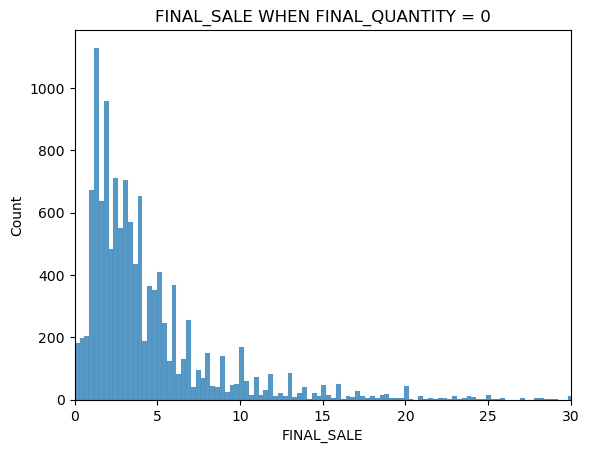

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


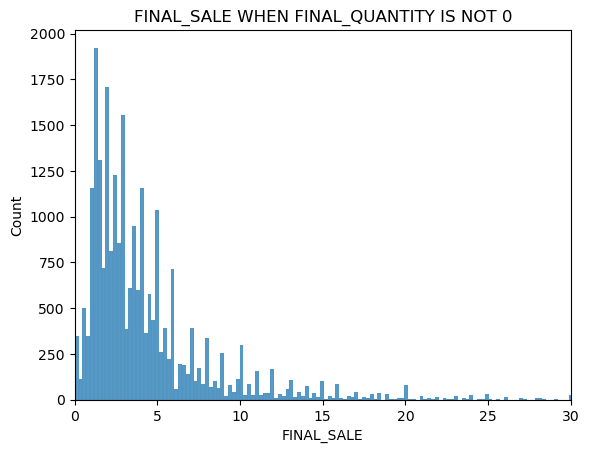

In [228]:
# Most other fields can be easily understood with two exceptions final_sale and final_quantity.
# Trying to understand 2 scenarios: (1) final_sale is not NA when final_quantity is 0.  (2) final_sale is NA when final_quantity is 1, 2, 3....
# Both situations look confusing at first glance. Decided to visualize these circumstances 
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df_1 = transaction_df[transaction_df["FINAL_QUANTITY"] == 0]
filtered_df_2 = transaction_df[transaction_df["FINAL_QUANTITY"] != 0]

sns.histplot(x=filtered_df_1['FINAL_SALE'])
plt.xlim(0, 30) 
plt.title("FINAL_SALE WHEN FINAL_QUANTITY = 0")
plt.show() 

sns.histplot(x=filtered_df_2['FINAL_SALE'])
plt.xlim(0, 30) 
plt.title("FINAL_SALE WHEN FINAL_QUANTITY IS NOT 0")
plt.show() 
# When quantity = 0, sales should be 0. Histogram shows the opposite. 
# when quantity isn't 0, sales are supposed to be positive. This is true. 

In [235]:
# Sort data by RECEIPT_ID 
transaction_df = transaction_df.sort_values(by="RECEIPT_ID")
print(transaction_df.head(10))

# Count distinct RECEIPT_ID, there are 24440. Each RECEIPT_ID roughly corresponds to 2 rows of data. Now by looking at the quantity and sale fields,
print("=== Distinct Receipt Count ===")
distinct_receipt_count = transaction_df['RECEIPT_ID'].nunique()
print(distinct_receipt_count)
# My assumption is that for each recepit / transaction, The first row might reflect an incomplete scan — Fetch identified the item 
# and its quantity (e.g., 1) but failed to capture the price (hence sale = NA). Another screnario is that quantity may not be correctly captured in 
# in the 1st row but gets corrected in the 2nd row. Thus, the 1st recepit_ID ending in 0c99 should correspond to quantity=1 and sale=1.54. 
# Similarly, 2nd recepit_ID corresponds to quantity=1 and sale=1.49. 

                                 RECEIPT_ID PURCHASE_DATE  \
0      0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
41567  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1      0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
39291  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
25928  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
2      00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3      000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
41475  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4      00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   
43233  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   

                             SCAN_DATE STORE_NAME                   USER_ID  \
0     2024-08-21 14:19:06.539000+00:00    WALMART  63b73a7f3d310dceeabd4758   
41567 2024-08-21 14:19:06.539000+00:00    WALMART  63b73a7f3d310dceeabd4758   
1     2024-07-20 09:50:24.206000+00:00       ALDI  62c08877baa38d1a1f6c211a   
39291 2024-0

In [236]:
# Closed-ended questions:
# What are the top 5 brands by receipts scanned among users 21 and over?
import sqlite3
import pandas as pd
from datetime import datetime

# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Load DataFrames into the SQLite database
user_df.to_sql("USERS", conn, index=False, if_exists="replace")
transaction_df.to_sql("TRANSACTIONS", conn, index=False, if_exists="replace")
product_df.to_sql("PRODUCTS", conn, index=False, if_exists="replace")

# Pulling top 5 brands by transactions for users Aged 21 and + 
query = """
SELECT 
    P.BRAND,
    COUNT(DISTINCT T.RECEIPT_ID) AS RECEIPT_COUNT
FROM TRANSACTIONS AS T
JOIN USERS AS U 
    ON T.USER_ID = U.ID
JOIN PRODUCTS AS P
    ON T.BARCODE = P.BARCODE
WHERE U.BIRTH_DATE <= '2004-02-05' AND BRAND !='None'              
GROUP BY P.BRAND
ORDER BY RECEIPT_COUNT DESC
LIMIT 5;
"""
top_brands_receipts = pd.read_sql_query(query, conn)

# Display results
print(top_brands_receipts)

# Findings: top 5 brans for users 21 and over are Nerds Candy, Dove, Trident, Sour Patch Kids and Meijer 

             BRAND  RECEIPT_COUNT
0      NERDS CANDY              3
1             DOVE              3
2          TRIDENT              2
3  SOUR PATCH KIDS              2
4           MEIJER              2


In [239]:
# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Load DataFrames into the SQLite database
user_df.to_sql("USERS", conn, index=False, if_exists="replace")
transaction_df.to_sql("TRANSACTIONS", conn, index=False, if_exists="replace")
product_df.to_sql("PRODUCTS", conn, index=False, if_exists="replace")

# Pulling total sales by brand 
query = """
SELECT 
    p.brand,
    SUM(t.final_sale) AS total_sales
FROM transactions AS t
JOIN users AS u 
    ON t.user_id = u.id
JOIN products AS p
    ON t.barcode = p.barcode
WHERE u.created_date <= DATE('now', '-6 months') AND BRAND !='None'
GROUP BY p.brand
ORDER BY total_sales DESC
LIMIT 5;
"""
top_brands_sales = pd.read_sql_query(query, conn)

# Display results
print(top_brands_sales)

# Findings: Top 5 brands by total sales are CVS, TRIDENT, DOVE, COORS LIGHT and QUAKER. 

         BRAND  total_sales
0          CVS        72.00
1      TRIDENT        46.72
2         DOVE        42.88
3  COORS LIGHT        34.96
4       QUAKER        16.60


In [ ]:
# Open-ended questions: for these, make assumptions and clearly state them when answering the question.
# 1. Which is the leading brand in the Dips & Salsa category?
# Answer: a leading brand can be defined as the brand with the highest # of transactions, highest quanity sold, highest total sales in $, 
# or largest share of users who buy that brand. 
# Each metric has its pros and cons. I pikced the brand with most receipts as the leading brans in Dips and Salsa due to following reasons:
# (1) A high “receipt count” for a brand means it appears frequently among user submissions, reflecting both brand presence and popularity
# (2) A brand that shows up on a large # of receipts is a strong candidate for promotional campaigns, which Fetch can sell as an advertising channel.

# Sample SQL query 
SELECT 
    P.BRAND, 
    COUNT(DISTINCT T.RECEIPT_ID) AS RECEIPT_COUNT
FROM TRANSACTIONS AS T
JOIN PRODUCTS AS P
    ON T.BARCODE = P.BARCODE
WHERE P.CATEGORY_2 = 'DIPS & SALSA'
GROUP BY P.BRAND
ORDER BY RECEIPT_COUNT DESC
LIMIT 1;

In [ ]:
# COMMUNICATE WTIH STAKEHOLDERS
# WRITE AN EMAIL OR SLACK MESSAGE TO A PRODUCT OR BUSINESS LEADER AND SUMMARIZE THE RESULTS 
To whom it may concern,

After conducting a comprehensive review of the dataset, I can confirm that the overall data quality is high, with no significant issues that 
would impact analytical or operational integrity. No siginicant duplication was found  and while there are a small number of missing values, they 
do not affect critical variables. Additionally, all fields were reviewed for inconsistencies, and formatting has been standardized.

Upon reviewing the transactional dataset, I observed that in most cases, each transaction appears to generate two rows, with the second row capturing 
an adjustment or correction of the original entry. This pattern suggests that the system might be automatically generating a second row to rectify 
errors in quantity, sales amount, or other transaction details. Could you confirm if this is the intended behavior?

In part 2 of my analysis, I extracted the top 5 brands for users aged 21 and above and the top 5 brands for users who have been with us for more than 
6 months. The overlapping brands are Trident and Dove. I can conduct a deeper analysis on these brands to examine their popularity under other 
conditions. Let me know if that would be useful. 

Lastly, we only have 3 months of transactional data from Jun to Sep 2024. A more comprehensive analysis could be conducted if additional quarters or 
years of data are available. Let me know if this is something worth pursuing.

Thanks for your time and insights. Looking forward to your thoughts!

Best,
Ryan Chen 